# Jeepney Fare

In this example, we will build a Multiple Linear Regression model to study the linear relationship between **fuel price**, **water price** and **jeepney fare**.


<img src="jeepney.gif" />

## Step 1: Import the necessary libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Step 2: Create the dataset

In [12]:
x = [1,2,3,4,5]
y = [5,4,3,2,1]
z = [2,4,5,4,5]

dict = {'fuelprice': x, 'waterprice': y , 'fare': z}

df = pd.DataFrame(dict)
df.head()

,fuelprice,waterprice,fare
0,1,5,2
1,2,4,4
2,3,3,5
3,4,2,4
4,5,1,5


## Step 3: Check correlation of variables

Correlation measures the strength of the relationship between two variables. In other words, it tells you how closely two variables are related.


In [13]:
correlation = df.corr()
correlation

,fuelprice,waterprice,fare
fuelprice,1.000000,-1.000000,0.774597
waterprice,-1.000000,1.000000,-0.774597
fare,0.774597,-0.774597,1.000000


This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the `corr()` function from Pandas dataframe. Then we can display it as a heatmap using `heatmap()` function from Seaborn.

<Axes: >

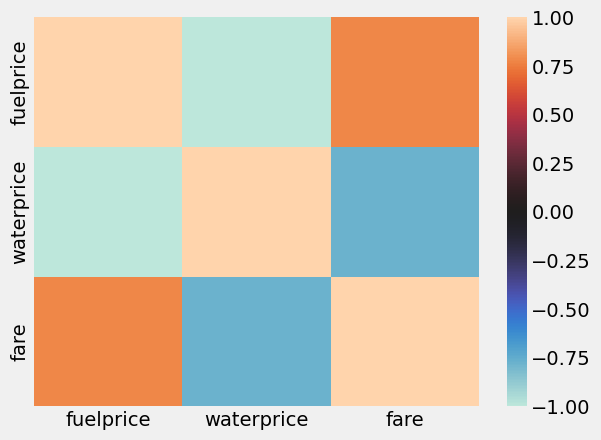

In [14]:
sns.heatmap(correlation, vmin=-1, vmax=1, center=0)

## Step 4: Create the model

In [15]:
# Get the all features in the fuelprice column
X = df[['fuelprice', 'waterprice']]

# Get the all features in the fare column
y = df['fare']

In [16]:
# Create an instance of linear regression class 
mymodel = LinearRegression()

# Train the model 
mymodel.fit(X,y)

# Make prediction
y_pred = mymodel.predict(X)

In [17]:
print('Intercept:', mymodel.intercept_)
print('Coefficients:', mymodel.coef_)

Intercept: 4.0
Coefficients: [ 0.3 -0.3]


## Step 6 : Compute $R^2$

## Coefficient of Determination ($R^2$)

Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable.  $R^2$ scores are calculated as below:


$$ R^2 = 1 - \frac{SSE}{SST} $$ 

In pandas, we can also obtain the $R^2$ value of our model by accesing the `.score` attribute of the our model.

In [18]:
X = df[['fuelprice', 'waterprice']]
Y = df['fare']

r2 = mymodel.score(X, y)
print(r2)

0.6000000000000001


In sklearn, we can also obtain the $R^2$ value of our model by importing the `r2_score` function.

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(r2)

0.6000000000000001


## Step 5: Plot the model

In [20]:
# Create range for each dimension
x = df['fuelprice']
y = df['waterprice']
z = df['fare']

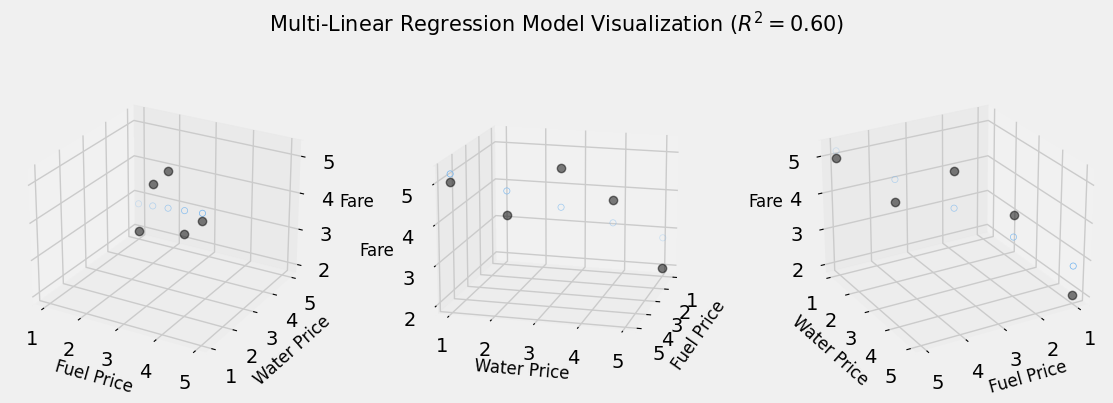

In [21]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15,
            linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x, y, y_pred,
               facecolor=(0, 0, 0, 0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Fuel Price', fontsize=12)
    ax.set_ylabel('Water Price', fontsize=12)
    ax.set_zlabel('Fare', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' %
             r2, fontsize=15, color='k')

fig.tight_layout()
